In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [6]:
df = pd.read_csv("bank.csv")

In [7]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1


In [9]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null int64
marital      11162 non-null int64
education    11162 non-null int64
default      11162 non-null int64
balance      11162 non-null int64
housing      11162 non-null int64
loan         11162 non-null int64
contact      11162 non-null int64
day          11162 non-null int64
month        11162 non-null int64
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null int64
deposit      11162 non-null int64
dtypes: int64(17)
memory usage: 1.4 MB


In [59]:
def classify(model):
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    print (classification_report(y_test,y_pred))
    return model

In [13]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state=1)

In [25]:
lr= LogisticRegression(random_state = 1)

In [26]:
classify(lr)

              precision    recall  f1-score   support

           0       0.80      0.82      0.81      1760
           1       0.79      0.78      0.78      1589

    accuracy                           0.80      3349
   macro avg       0.80      0.80      0.80      3349
weighted avg       0.80      0.80      0.80      3349



In [28]:
from sklearn.tree import DecisionTreeClassifier

In [29]:
dt = DecisionTreeClassifier()

In [30]:
classify(dt)

              precision    recall  f1-score   support

           0       0.79      0.80      0.79      1760
           1       0.77      0.77      0.77      1589

    accuracy                           0.78      3349
   macro avg       0.78      0.78      0.78      3349
weighted avg       0.78      0.78      0.78      3349



In [31]:
dt2  = DecisionTreeClassifier(max_depth=10)


In [32]:
classify(dt2)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1760
           1       0.81      0.80      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



In [57]:
dt3  = DecisionTreeClassifier(min_samples_leaf=10)


In [60]:
dt3= classify(dt3)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      1760
           1       0.81      0.80      0.80      1589

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



In [61]:
from sklearn import tree

[Text(154.06704388786764, 211.4, 'X[11] <= 206.5\ngini = 0.499\nsamples = 7813\nvalue = [4113, 3700]'),
 Text(71.35194209558823, 199.32, 'X[13] <= 27.5\ngini = 0.325\nsamples = 3136\nvalue = [2495, 641]'),
 Text(53.73570772058823, 187.24, 'X[0] <= 60.5\ngini = 0.247\nsamples = 2456\nvalue = [2101, 355]'),
 Text(39.723650735294115, 175.16, 'X[10] <= 9.5\ngini = 0.221\nsamples = 2375\nvalue = [2075, 300]'),
 Text(17.21388970588235, 163.07999999999998, 'X[10] <= 0.5\ngini = 0.197\nsamples = 2308\nvalue = [2052, 256]'),
 Text(5.908235294117647, 151.0, 'X[6] <= 0.5\ngini = 0.5\nsamples = 115\nvalue = [58, 57]'),
 Text(3.9388235294117644, 138.92000000000002, 'X[9] <= 21.5\ngini = 0.346\nsamples = 63\nvalue = [14, 49]'),
 Text(3.1510588235294117, 126.84, 'X[2] <= 1.5\ngini = 0.219\nsamples = 48\nvalue = [6, 42]'),
 Text(1.5755294117647058, 114.75999999999999, 'X[5] <= 531.0\ngini = 0.363\nsamples = 21\nvalue = [5, 16]'),
 Text(0.7877647058823529, 102.67999999999999, 'gini = 0.42\nsamples = 10

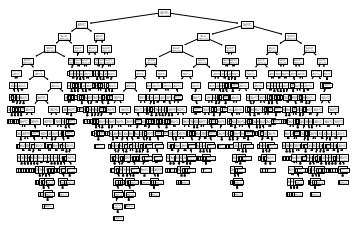

In [62]:
tree.plot_tree(dt3)

In [68]:
dt3.feature_importances_

array([0.05416457, 0.01307797, 0.00712708, 0.0021074 , 0.        ,
       0.04378172, 0.05927677, 0.00252668, 0.08723102, 0.05504404,
       0.10509058, 0.43610491, 0.00774507, 0.06509976, 0.01230429,
       0.04931815])

In [67]:
a=dt3.feature_importances_
a.sort()
a

array([0.        , 0.0021074 , 0.00252668, 0.00712708, 0.00774507,
       0.01230429, 0.01307797, 0.04378172, 0.04931815, 0.05416457,
       0.05504404, 0.05927677, 0.06509976, 0.08723102, 0.10509058,
       0.43610491])

In [64]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
